In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

#for preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import joblib

# for resampling 
from imblearn.over_sampling import RandomOverSampler

#For model
from tensorflow import keras
import tensorflow as tf

# for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Import Data

In [2]:
data=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
data['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [6]:
data['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [7]:
data['Quality of Sleep'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

In [8]:
data['Stress Level'].value_counts()

3    71
8    70
4    70
5    67
7    50
6    46
Name: Stress Level, dtype: int64

In [9]:
data['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [10]:
data['Blood Pressure'].value_counts()

130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: int64

In [11]:
data['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

# Preprocessing Data

In [12]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [13]:
#menghitung missing value
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [14]:
# rename the following columns
data.rename(columns={'Sleep Duration':'Sleep_Duration',
                    'Quality of Sleep':'Sleep_Quality',
                    'Physical Activity Level':'Physical_Activity_Level',
                    'Stress Level':'Stress_Level',
                    'BMI Category':'BMI_Category',
                    'Blood Pressure':'Blood_Pressure',
                    'Heart Rate':'Heart_Rate',
                    'Daily Steps':'Daily_Steps',
                    'Sleep Disorder':'Sleep_Disorder'}, inplace=True)
data

,Person ID,Gender,Age,Occupation,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [15]:
# the category `Normal` & `Normal Weight` in column `BMI_Category` have similar meaning
# convert the `Normal Weight` to `Normal`
data['BMI_Category'] = np.where(data['BMI_Category']=='Normal Weight', 'Normal', data['BMI_Category'])
data

,Person ID,Gender,Age,Occupation,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [16]:
# extract the systolic & diastolic blood pressure values from column `Blood_Pressure`
data['Systolic'] = data['Blood_Pressure'].str.split('/').str[0].astype(int)
data['Diastolic'] = data['Blood_Pressure'].str.split('/').str[1].astype(int)

In [17]:
# define a function to categorize the hypertesion stage based on the guidelines from
# American College of Cardiology and the American Heart Association

def bp_category(systolic, diastolic):
    if systolic <= 120 and diastolic <= 80:
        return 'Normal'
    elif 120 < systolic <= 129 and diastolic <= 80:
        return 'Elevated'
    elif (130 <= systolic <= 139) or (80 < diastolic < 89):
        return 'Stage 1'
    else:
        return 'Stage 2'

In [18]:
# create a new column in the dataset `BP_Category`
data['BP_Category'] = data.apply(lambda row: bp_category(row['Systolic'], row['Diastolic']), axis=1)

In [19]:
# column `Sleeop_Disorder` contains information of 
# the presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea)
# the `NaN` value indicates no sleep disorder
# convert the `NaN` value to `Normal`

data['Sleep_Disorder'] = np.where(data['Sleep_Disorder'].isna(), 'Normal', data['Sleep_Disorder'])
data

,Person ID,Gender,Age,Occupation,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic,Diastolic,BP_Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Stage 1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Stage 2
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Stage 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,Stage 2
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,Stage 2
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,Stage 2
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,Stage 2


In [20]:
data['BP_Category'].value_counts()

Stage 1     150
Normal       86
Stage 2      71
Elevated     67
Name: BP_Category, dtype: int64

In [21]:
# drop columns `Blood_Pressure`, 'Systolic', 'Diastolic'
data.drop(columns=['Blood_Pressure', 'Systolic', 'Diastolic','Person ID','Occupation'], axis=1, inplace=True)
data

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
0,Male,27,6.1,6,42,6,Overweight,77,4200,None,Stage 1
1,Male,28,6.2,6,60,8,Normal,75,10000,None,Elevated
2,Male,28,6.2,6,60,8,Normal,75,10000,None,Elevated
3,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Stage 2
4,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Stage 2
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Stage 2
370,Female,59,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,Stage 2
371,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Stage 2
372,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Stage 2


In [22]:
data["BP_Category"].value_counts()

Stage 1     150
Normal       86
Stage 2      71
Elevated     67
Name: BP_Category, dtype: int64

In [23]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Daftar variabel yang akan di-label encoding
categorical_columns = ['Gender', 'Sleep_Quality', 'Stress_Level', 'BMI_Category', 'BP_Category', 'Sleep_Disorder']

# Melakukan label encoding untuk setiap variabel kategori
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

data

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
0,1,27,6.1,2,42,3,2,77,4200,1,2
1,1,28,6.2,2,60,5,0,75,10000,1,0
2,1,28,6.2,2,60,5,0,75,10000,1,0
3,1,28,5.9,0,30,5,1,85,3000,2,3
4,1,28,5.9,0,30,5,1,85,3000,2,3
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,8.1,5,75,0,2,68,7000,2,3
370,0,59,8.0,5,75,0,2,68,7000,2,3
371,0,59,8.1,5,75,0,2,68,7000,2,3
372,0,59,8.1,5,75,0,2,68,7000,2,3


In [24]:
data_sleep_disorder_0 = data[data['Sleep_Disorder'] == 0]

# Menampilkan data yang telah difilter
data_sleep_disorder_0

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
5,1,28,5.9,0,30,5,1,85,3000,0,3
6,1,29,6.3,2,40,4,1,82,3500,0,3
18,0,29,6.5,1,40,4,0,80,4000,0,2
31,0,30,6.4,1,35,4,0,78,4100,0,2
67,1,33,6.0,2,30,5,0,72,5000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
308,0,52,6.6,3,45,4,2,72,6000,0,2
309,0,52,6.6,3,45,4,2,72,6000,0,2
310,0,52,6.6,3,45,4,2,72,6000,0,2
311,0,52,6.6,3,45,4,2,72,6000,0,2


In [25]:
data_sleep_disorder_1 = data[data['Sleep_Disorder'] == 1]

# Menampilkan data yang telah difilter
data_sleep_disorder_1

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
0,1,27,6.1,2,42,3,2,77,4200,1,2
1,1,28,6.2,2,60,5,0,75,10000,1,0
2,1,28,6.2,2,60,5,0,75,10000,1,0
7,1,29,7.8,3,75,3,0,70,8000,1,1
8,1,29,7.8,3,75,3,0,70,8000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
341,0,56,8.2,5,90,0,0,65,10000,1,1
342,0,56,8.2,5,90,0,0,65,10000,1,1
343,0,57,8.1,5,75,0,2,68,7000,1,3
358,0,59,8.0,5,75,0,2,68,7000,1,3


In [26]:
data_sleep_disorder_2 = data[data['Sleep_Disorder'] == 2]

# Menampilkan data yang telah difilter
data_sleep_disorder_2

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
3,1,28,5.9,0,30,5,1,85,3000,2,3
4,1,28,5.9,0,30,5,1,85,3000,2,3
16,0,29,6.5,1,40,4,0,80,4000,2,2
17,1,29,6.0,2,30,5,0,70,8000,2,1
30,0,30,6.4,1,35,4,0,78,4100,2,2
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,8.1,5,75,0,2,68,7000,2,3
370,0,59,8.0,5,75,0,2,68,7000,2,3
371,0,59,8.1,5,75,0,2,68,7000,2,3
372,0,59,8.1,5,75,0,2,68,7000,2,3


In [27]:
# Mengambil variabel yang akan dinormalisasi
columns_to_normalize = ['Age', 'Sleep_Duration', 'Physical_Activity_Level', 'Heart_Rate', 'Daily_Steps']

# Melakukan normalisasi
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
0,1,0.00000,0.111111,2,0.20,3,2,0.571429,0.171429,1,2
1,1,0.03125,0.148148,2,0.50,5,0,0.476190,1.000000,1,0
2,1,0.03125,0.148148,2,0.50,5,0,0.476190,1.000000,1,0
3,1,0.03125,0.037037,0,0.00,5,1,0.952381,0.000000,2,3
4,1,0.03125,0.037037,0,0.00,5,1,0.952381,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.00000,0.851852,5,0.75,0,2,0.142857,0.571429,2,3
370,0,1.00000,0.814815,5,0.75,0,2,0.142857,0.571429,2,3
371,0,1.00000,0.851852,5,0.75,0,2,0.142857,0.571429,2,3
372,0,1.00000,0.851852,5,0.75,0,2,0.142857,0.571429,2,3


In [28]:
# Menyimpan model normalisasi menggunakan joblib
joblib.dump(scaler, 'normalization_model.joblib')

['normalization_model.joblib']

In [29]:
data_sleep_disorder0 = data[data['Sleep_Disorder'] == 0]

# Menampilkan data yang telah difilter
data_sleep_disorder0

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
5,1,0.03125,0.037037,0,0.000000,5,1,0.952381,0.000000,0,3
6,1,0.06250,0.185185,2,0.166667,4,1,0.809524,0.071429,0,3
18,0,0.06250,0.259259,1,0.166667,4,0,0.714286,0.142857,0,2
31,0,0.09375,0.222222,1,0.083333,4,0,0.619048,0.157143,0,2
67,1,0.18750,0.074074,2,0.000000,5,0,0.333333,0.285714,0,0
...,...,...,...,...,...,...,...,...,...,...,...
308,0,0.78125,0.296296,3,0.250000,4,2,0.333333,0.428571,0,2
309,0,0.78125,0.296296,3,0.250000,4,2,0.333333,0.428571,0,2
310,0,0.78125,0.296296,3,0.250000,4,2,0.333333,0.428571,0,2
311,0,0.78125,0.296296,3,0.250000,4,2,0.333333,0.428571,0,2


In [30]:
data_sleep_disorder1 = data[data['Sleep_Disorder'] == 1]

# Menampilkan data yang telah difilter
data_sleep_disorder1

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
0,1,0.00000,0.111111,2,0.20,3,2,0.571429,0.171429,1,2
1,1,0.03125,0.148148,2,0.50,5,0,0.476190,1.000000,1,0
2,1,0.03125,0.148148,2,0.50,5,0,0.476190,1.000000,1,0
7,1,0.06250,0.740741,3,0.75,3,0,0.238095,0.714286,1,1
8,1,0.06250,0.740741,3,0.75,3,0,0.238095,0.714286,1,1
...,...,...,...,...,...,...,...,...,...,...,...
341,0,0.90625,0.888889,5,1.00,0,0,0.000000,1.000000,1,1
342,0,0.90625,0.888889,5,1.00,0,0,0.000000,1.000000,1,1
343,0,0.93750,0.851852,5,0.75,0,2,0.142857,0.571429,1,3
358,0,1.00000,0.814815,5,0.75,0,2,0.142857,0.571429,1,3


In [31]:
data_sleep_disorder2 = data[data['Sleep_Disorder'] == 2]

# Menampilkan data yang telah difilter
data_sleep_disorder2

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
3,1,0.03125,0.037037,0,0.000000,5,1,0.952381,0.000000,2,3
4,1,0.03125,0.037037,0,0.000000,5,1,0.952381,0.000000,2,3
16,0,0.06250,0.259259,1,0.166667,4,0,0.714286,0.142857,2,2
17,1,0.06250,0.074074,2,0.000000,5,0,0.238095,0.714286,2,1
30,0,0.09375,0.222222,1,0.083333,4,0,0.619048,0.157143,2,2
...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.00000,0.851852,5,0.750000,0,2,0.142857,0.571429,2,3
370,0,1.00000,0.814815,5,0.750000,0,2,0.142857,0.571429,2,3
371,0,1.00000,0.851852,5,0.750000,0,2,0.142857,0.571429,2,3
372,0,1.00000,0.851852,5,0.750000,0,2,0.142857,0.571429,2,3


# Make ANN Model

In [32]:
#feature selection data and split data
X = data.drop(columns='Sleep_Disorder')
y = data.Sleep_Disorder

In [33]:
X

,Gender,Age,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,BP_Category
0,1,0.00000,0.111111,2,0.20,3,2,0.571429,0.171429,2
1,1,0.03125,0.148148,2,0.50,5,0,0.476190,1.000000,0
2,1,0.03125,0.148148,2,0.50,5,0,0.476190,1.000000,0
3,1,0.03125,0.037037,0,0.00,5,1,0.952381,0.000000,3
4,1,0.03125,0.037037,0,0.00,5,1,0.952381,0.000000,3
...,...,...,...,...,...,...,...,...,...,...
369,0,1.00000,0.851852,5,0.75,0,2,0.142857,0.571429,3
370,0,1.00000,0.814815,5,0.75,0,2,0.142857,0.571429,3
371,0,1.00000,0.851852,5,0.75,0,2,0.142857,0.571429,3
372,0,1.00000,0.851852,5,0.75,0,2,0.142857,0.571429,3


In [34]:
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep_Disorder, Length: 374, dtype: int32

In [35]:
y.value_counts()

1    219
2     78
0     77
Name: Sleep_Disorder, dtype: int64

In [36]:
#data traing 90% dan data testing 10% before random oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((299, 10), (75, 10), (299,), (75,))

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [38]:
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3)

model.compile(
    loss=scce,
    optimizer=optimizer,
    metrics=['accuracy']
)

In [39]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 1s 125ms/step - loss: 1.0932 - accuracy: 0.4214 - val_loss: 1.0780 - val_accuracy: 0.5867
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0725 - accuracy: 0.6789 - val_loss: 1.0613 - val_accuracy: 0.7200
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 1.0645 - accuracy: 0.6656 - val_loss: 1.0422 - val_accuracy: 0.7200
Epoch 4/100
3/3 [==============================] - 0s 48ms/step - loss: 1.0382 - accuracy: 0.6990 - val_loss: 1.0220 - val_accuracy: 0.7200
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 1.0043 - accuracy: 0.7258 - val_loss: 0.9809 - val_accuracy: 0.7067
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 0.9623 - accuracy: 0.7057 - val_loss: 0.9375 - val_accuracy: 0.7067
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9256 - accuracy: 0.7157 - val_loss: 0.8996 - val_accuracy: 0.6667
Epoch 8/100
3/3 [==

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
Total params: 3475 (13.57 KB)
Trainable params: 3475 (13

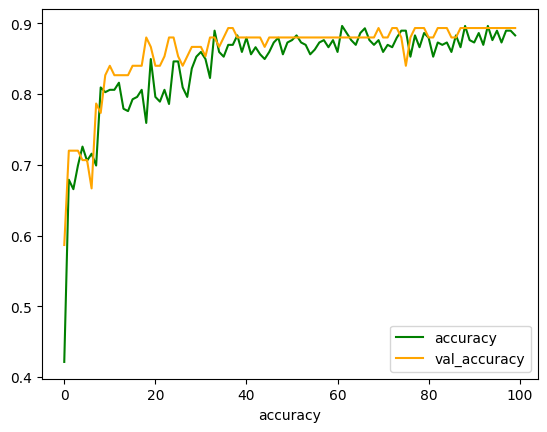

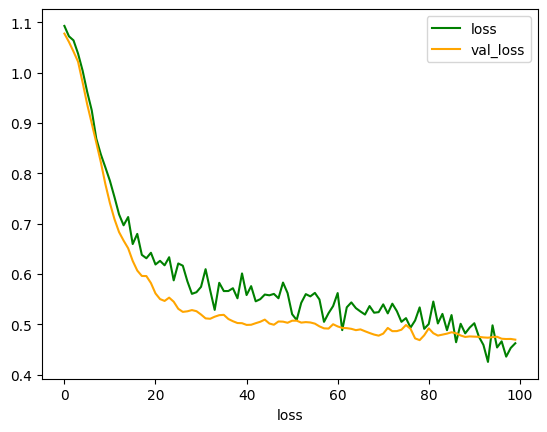

In [41]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'green')
    plt.plot(history.history['val_'+string], color = 'orange')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [42]:
evaluation = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.4694 - accuracy: 0.8933


In [43]:
ann_pred = np.argmax(model.predict(X_test),axis=1)
ann_pred

3/3 [==============================] - 0s 3ms/step


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2], dtype=int64)

In [44]:
print ('accuracy_score: ',accuracy_score(ann_pred, y_test))
print ('f1_score: ',f1_score(ann_pred, y_test, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(ann_pred, y_test, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(ann_pred, y_test, pos_label='positive', average='micro'))

accuracy_score:  0.8933333333333333
f1_score:  0.8933333333333333
recall_score:  0.8933333333333333
precision_score:  0.8933333333333333


In [45]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.91      0.98      0.94        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.88      0.85      0.86        75
weighted avg       0.89      0.89      0.89        75



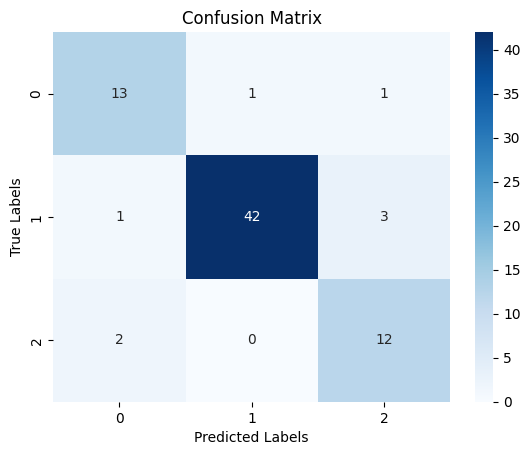

In [46]:
# Create the confusion matrix
confusion = confusion_matrix(ann_pred, y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")

# Set the axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the title
plt.title("Confusion Matrix")

# Display the plot
plt.show()

# Save Model

In [47]:
# Save your model
model.save('saved_model_ann')

INFO:tensorflow:Assets written to: saved_model_ann\assets


INFO:tensorflow:Assets written to: saved_model_ann\assets


In [48]:
# Save your model
model.save('model_ann.h5')

# Export Model

In [49]:
# Convert the SavedModel to TFLite format with optimizations
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_ann')
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply default optimizations
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model_ann.tflite', 'wb') as f:
    f.write(tflite_model)

# Mencoba model

In [50]:
# Memuat kembali model
loaded_model = tf.keras.models.load_model('model_ann.h5')  # Ganti dengan lokasi penyimpanan model Anda

# Contoh data baru (gantilah dengan data yang sebenarnya)
new_data = np.array([[0, 1, 0.814815, 5, 0.750000, 0, 2, 0.142857, 0.571429, 3]])  # Sesuaikan dengan fitur-fitur yang dibutuhkan oleh model

In [51]:

# Melakukan prediksi pada data baru
prediction = loaded_model.predict(new_data)

# Mendapatkan kelas prediksi (indeks kelas dengan probabilitas tertinggi)
predicted_class = np.argmax(prediction, axis=1)

# Menampilkan hasil prediksi
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 82ms/step
Predicted Class: [2]


In [58]:
# Menggunakan MinMaxScaler yang sama yang digunakan selama pelatihan model
scaler = MinMaxScaler()

# Contoh data input untuk prediksi
input_data = pd.DataFrame({
    'Gender': [1],
    'Age': [28],
    'Sleep_Duration': [5.9],
    'Sleep_Quality': [0],
    'Physical_Activity_Level': [30],
    'Stress_Level': [5],
    'BMI_Category': [1],
    'Heart_Rate': [85],
    'Daily_Steps': [3000],
    'BP_Category': [3]
})

# Lakukan normalisasi pada variabel yang perlu dinormalisasi
input_data[['Age', 'Sleep_Duration', 'Physical_Activity_Level', 'Heart_Rate', 'Daily_Steps']] = scaler.fit_transform(input_data[['Age', 'Sleep_Duration', 'Physical_Activity_Level', 'Heart_Rate', 'Daily_Steps']])

# Load model yang telah disimpan sebelumnya
loaded_model = tf.keras.models.load_model('model_ann.h5')

# Lakukan prediksi
prediction = loaded_model.predict(input_data)

# Ambil kelas prediksi (misalnya, menggunakan argmax)
predicted_class = np.argmax(prediction, axis=1)

print("Predicted Sleep Disorder Class:", predicted_class)


1/1 [==============================] - 0s 118ms/step
Predicted Sleep Disorder Class: [2]
